Dataset 'assets/DiabetesData.csv' berhasil dimuat.
     glucose  bloodpressure  diabetes
0         40             85         0
1         40             92         0
2         45             63         1
3         45             80         0
4         40             73         1
..       ...            ...       ...
990       45             87         0
991       40             83         0
992       40             83         0
993       40             60         1
994       45             82         0

[995 rows x 3 columns]


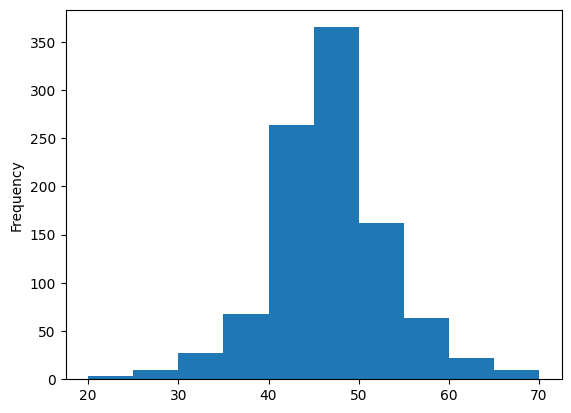

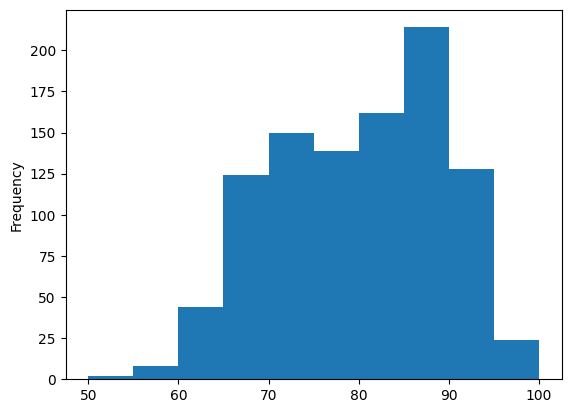

In [35]:
# ==============================================================================
# SEL 1: PERSIAPAN DAN MEMUAT DATA
# ==============================================================================
import math
import pandas as pd
import matplotlib.pyplot as plt

# --- Pastikan Anda sudah mengupload file CSV Anda ke sesi Colab ---
# --- Ganti 'nama_dataset_anda.csv' dengan nama file Anda yang sebenarnya ---

try:
    nama_file = 'assets/DiabetesData.csv'
    df = pd.read_csv(nama_file)

    print(f"Dataset '{nama_file}' berhasil dimuat.")
    print(df)
    df['glucose'].plot(kind = 'hist')
    plt.show()
    df['bloodpressure'].plot(kind = 'hist')
    plt.show()

    # Memisahkan fitur (X) dan label (y) dari DataFrame
    # Ganti nama kolom jika perlu agar sesuai dengan dataset Anda
    X = df[['glucose', 'bloodpressure']]
    y = df['diabetes']

    # Mengonversi data ke format list yang akan digunakan oleh model kita
    X_train = X.values.tolist()
    y_train = y.tolist()

except FileNotFoundError:
    print(f"Error: File '{nama_file}' tidak ditemukan!")
    print("Pastikan nama file sudah benar dan file sudah di-upload ke sesi Colab.")

In [36]:
# ==============================================================================
# SEL 2: DEFINISI CLASS GAUSSIAN NAIVE BAYES
# ==============================================================================

class GaussianNB:
    """
    Blueprint untuk algoritma Gaussian Naive Bayes.
    Setiap bagian algoritma dijelaskan dalam fungsi di bawah ini.
    """

    # --- BAGIAN 1: FASE PELATIHAN (MODEL BELAJAR) ---
    def fit(self, X, y):
        # Persiapan Awal
        n_samples, n_features = len(X), len(X[0])
        self.classes = list(set(y))

        # Membuat "Buku Catatan" kosong
        self.summaries = {}
        self.priors = {}

        # Memulai proses belajar untuk setiap kelas
        for c in self.classes:
            # Menyaring data untuk kelas yang sedang dipelajari
            X_c = [X[i] for i in range(n_samples) if y[i] == c]

            # Menghitung & mencatat Probabilitas Prior
            self.priors[c] = len(X_c) / float(n_samples)

            # Membuat halaman baru di buku catatan untuk kelas ini
            self.summaries[c] = {}

            # Mempelajari setiap fitur di dalam kelas ini
            for i in range(n_features):
                # Mengisolasi nilai untuk satu fitur
                feature_values = [row[i] for row in X_c]

                # Menghitung statistik
                if len(feature_values) < 2:
                    mean, stdev = 0, 0
                else:
                    mean = sum(feature_values) / float(len(feature_values))
                    stdev = math.sqrt(sum([(x - mean)**2 for x in feature_values]) / float(len(feature_values) - 1))

                # Mencatat hasil perhitungan statistik
                self.summaries[c][i] = [mean, stdev]

    # Di dalam class GaussianNB:
    def _calculate_probability(self, x, mean, stdev):
        # Penanganan kasus khusus
        if stdev == 0:
            return 1 if x == mean else 1e-9

        # Implementasi rumus Gaussian PDF
        exponent = math.exp(-((x - mean)**2 / (2 * stdev**2)))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    # --- BAGIAN 3: FASE PREDIKSI (MODEL MENEBAK) ---
    def predict(self, X):
        """Pintu masuk untuk memulai prediksi pada data baru."""
        return [self._predict_row(x) for x in X]

    def _predict_row(self, x):
        """Melakukan prediksi untuk satu baris data."""
        posteriors = {}
        for c in self.classes:
            posteriors[c] = math.log(self.priors[c])
            for i, feature_val in enumerate(x):
                mean, stdev = self.summaries[c][i]
                likelihood = self._calculate_probability(feature_val, mean, stdev)
                posteriors[c] += math.log(likelihood)
        return max(posteriors, key=posteriors.get)

print("Class GaussianNB berhasil didefinisikan.")

Class GaussianNB berhasil didefinisikan.


In [37]:
# ==============================================================================
# SEL 3: MEMBUAT DAN MELATIH MODEL
# ==============================================================================

# Membuat instance (objek) dari class GaussianNB
model = GaussianNB()

# Melatih model menggunakan data training yang sudah disiapkan
model.fit(X_train, y_train)

print("Model telah berhasil dilatih!")
print("-" * 30)
print("Statistik yang dipelajari oleh model:")
print("Probabilitas Prior (P(y)):", model.priors)
print("Rata-rata & St. Deviasi (per kelas, per fitur):")
import json
print(json.dumps(model.summaries, indent=4))

Model telah berhasil dilatih!
------------------------------
Statistik yang dipelajari oleh model:
Probabilitas Prior (P(y)): {0: 0.4994974874371859, 1: 0.5005025125628141}
Rata-rata & St. Deviasi (per kelas, per fitur):
{
    "0": {
        "0": [
            44.094567404426556,
            3.700630758134117
        ],
        "1": [
            86.738430583501,
            4.590047959869425
        ]
    },
    "1": {
        "0": [
            44.51807228915663,
            8.730752022827115
        ],
        "1": [
            71.64658634538152,
            6.281427895952207
        ]
    }
}


In [38]:
# ==============================================================================
# SEL 4: MENGGUNAKAN MODEL UNTUK PREDIKSI
# ==============================================================================

# Siapkan data baru yang ingin diprediksi
# Format: [[glucose, bloodpressure]]
data_baru = [[30,75]]

# Minta model yang sudah dilatih untuk membuat prediksi
prediksi = model.predict(data_baru)
hasil_prediksi = prediksi[0]

# Tampilkan hasil prediksi dengan cara yang mudah dibaca
print(f"Data baru: Glucose={data_baru[0][0]}, BloodPressure={data_baru[0][1]}")
print("-" * 30)
if hasil_prediksi == 1:
    print("Hasil Prediksi: Pasien ini kemungkinan Menderita Diabetes (Kelas 1)")
else:
    print("Hasil Prediksi: Pasien ini kemungkinan Tidak Menderita Diabetes (Kelas 0)")

Data baru: Glucose=30, BloodPressure=75
------------------------------
Hasil Prediksi: Pasien ini kemungkinan Menderita Diabetes (Kelas 1)


In [39]:
# ==============================================================================
# SEL 5: EVALUASI KINERJA MODEL
# ==============================================================================

# Langkah 1: Gunakan model yang sudah dilatih untuk membuat prediksi
# pada seluruh data latih (X_train)
y_pred = model.predict(X_train)

print("Membandingkan hasil prediksi model dengan label asli...")
print("Label Asli (y_train):", y_train)
print("Hasil Prediksi (y_pred):", y_pred)
print("-" * 30)


# Langkah 2: Hitung komponen Confusion Matrix (TP, TN, FP, FN)
# Kita akan melakukannya dari nol tanpa library
tp = 0  # True Positive
tn = 0  # True Negative
fp = 0  # False Positive
fn = 0  # False Negative

# Kelas positif kita adalah 1 (Diabetes)
positive_class = 1

for i in range(len(y_train)):
    actual = y_train[i]
    predicted = y_pred[i]

    if predicted == positive_class and actual == positive_class:
        tp += 1
    elif predicted != positive_class and actual != positive_class:
        tn += 1
    elif predicted == positive_class and actual != positive_class:
        fp += 1
    elif predicted != positive_class and actual == positive_class:
        fn += 1

# Langkah 3: Tampilkan hasil dalam bentuk Confusion Matrix
print("Hasil Perhitungan Confusion Matrix:")
print(f"True Positives (TP):  {tp}")
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}  <-- Kesalahan Tipe I (Alarm Palsu)")
print(f"False Negatives (FN): {fn}  <-- Kesalahan Tipe II (Meleset)")
print("-" * 30)

# Langkah 4: Hitung Metrik Evaluasi
print("Metrik Evaluasi Kinerja Model:")

# Akurasi: (TP + TN) / Total
# berapa persen tebakan model yang benar
total_samples = tp + tn + fp + fn
akurasi = (tp + tn) / total_samples
print(f"Akurasi: {akurasi:.2%}")

# Presisi: TP / (TP + FP)
# Menghindari pembagian dengan nol
# Dari semua yang kita prediksi sebagai 'Positif' (Diabetes), berapa persen yang sebenarnya memang Positif?
if (tp + fp) > 0:
    presisi = tp / (tp + fp)
    print(f"Presisi: {presisi:.2%}")
else:
    print("Presisi: N/A (Tidak ada prediksi positif)")

# Recall (Sensitivity): TP / (TP + FN)
# Dari semua yang sebenarnya 'Positif' (Diabetes), berapa persen yang berhasil ditemukan oleh model kita?
if (tp + fn) > 0:
    recall = tp / (tp + fn)
    print(f"Recall: {recall:.2%}")
else:
    print("Recall: N/A (Tidak ada sampel positif aktual)")

# F1-Score: 2 * (Presisi * Recall) / (Presisi + Recall)
if 'presisi' in locals() and 'recall' in locals() and (presisi + recall) > 0:
    f1_score = 2 * (presisi * recall) / (presisi + recall)
    print(f"F1-Score: {f1_score:.2%}")
else:
    print("F1-Score: N/A")

Membandingkan hasil prediksi model dengan label asli...
Label Asli (y_train): [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 

In [45]:
# train_and_save.py
from sklearn.naive_bayes import GaussianNB
import joblib

model.fit(X_train,y_train)

joblib.dump(model, "model.pkl")


['model.pkl']